In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Building a simple model using the Functional API
input = keras.Input(shape=(784,))
input.shape

TensorShape([None, 784])

In [4]:
input.dtype

tf.float32

In [5]:
# Image Input shape of 32x32 RGB images
img_input = keras.Input(shape=(32, 32, 3))
img_input.shape

TensorShape([None, 32, 32, 3])

In [7]:
# Building a simple model using the Functional API
x = layers.Dense(64, activation="relu")(input)

# Adding more layers
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(10)(x)

print("Input shape:", input.shape)
print("Intermediate shape:", x.shape)
print("Output shape:", output.shape)

Input shape: (None, 784)
Intermediate shape: (None, 64)
Output shape: (None, 10)


In [8]:
model = keras.Model(inputs=input, outputs=output, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


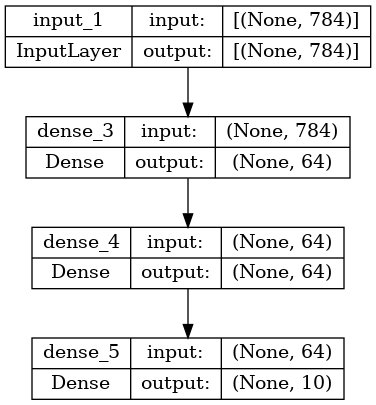

In [11]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [13]:
input = layers.Input(shape=(28,28))
layer1 = layers.Dense(20)(input)
model = keras.Model(inputs=input, outputs=layer1)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 dense_6 (Dense)             (None, 28, 20)            580       
                                                                 
Total params: 580 (2.27 KB)
Trainable params: 580 (2.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
input = layers.Input(shape=(28,28))
flat = layers.Flatten()(input)
layer1 = layers.Dense(20)(flat)
model = keras.Model(inputs=input, outputs=layer1)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 20)                15700     
                                                                 
Total params: 15700 (61.33 KB)
Trainable params: 15700 (61.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.save("mnist_model")
model = keras.models.load_model("mnist_model")
model.summary()

INFO:tensorflow:Assets written to: mnist_model/assets


INFO:tensorflow:Assets written to: mnist_model/assets


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 20)                15700     
                                                                 
Total params: 15700 (61.33 KB)
Trainable params: 15700 (61.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# A toy ResNet model

inputs = keras.Input(shape=(32,32,3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.Add()([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.Add()([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)             0         ['conv2d_1[0][0]']            
 D)                                                                                      

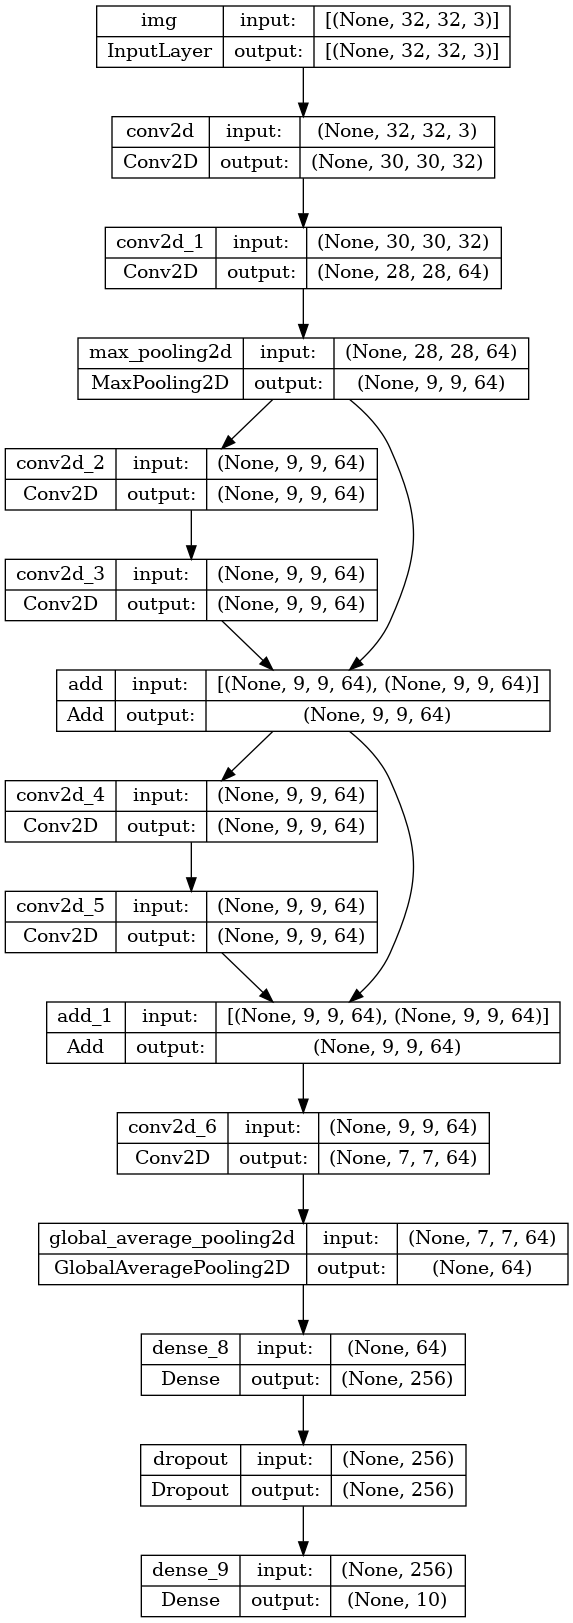

In [18]:
keras.utils.plot_model(model, "ResNet_Model.png", show_shapes=True)

In [22]:
# Training the ResNet Model

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

# Preprocessing the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training samples: 50000
Testing samples: 10000
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)


In [29]:
# Compiling the model
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

print("Training the ResNet Model: ")
ResNet_History = model.fit(x_train[:10000], y_train[:10000], 
                           epochs=10, batch_size=64, 
                           validation_split=0.2)

Training the ResNet Model: 
Epoch 1/10
125/125 [==============================] - 3s 14ms/step - loss: 0.2337 - accuracy: 0.9399 - val_loss: 2.2154 - val_accuracy: 0.6535
Epoch 2/10
125/125 [==============================] - 2s 12ms/step - loss: 0.1657 - accuracy: 0.9528 - val_loss: 2.3257 - val_accuracy: 0.6505
Epoch 3/10
125/125 [==============================] - 2s 12ms/step - loss: 0.1582 - accuracy: 0.9534 - val_loss: 2.5189 - val_accuracy: 0.6465
Epoch 4/10
125/125 [==============================] - 2s 12ms/step - loss: 0.1568 - accuracy: 0.9536 - val_loss: 2.5151 - val_accuracy: 0.6260
Epoch 5/10
125/125 [==============================] - 2s 12ms/step - loss: 0.1423 - accuracy: 0.9553 - val_loss: 2.3065 - val_accuracy: 0.6530
Epoch 6/10
125/125 [==============================] - 2s 12ms/step - loss: 0.1600 - accuracy: 0.9549 - val_loss: 2.6137 - val_accuracy: 0.6375
Epoch 7/10
125/125 [==============================] - 2s 12ms/step - loss: 0.1619 - accuracy: 0.9610 - val_loss: 2

313/313 [==============================] - 1s 3ms/step - loss: 2.6214 - accuracy: 0.6452
Test Loss: 2.6214
Test Accuracy: 0.6452


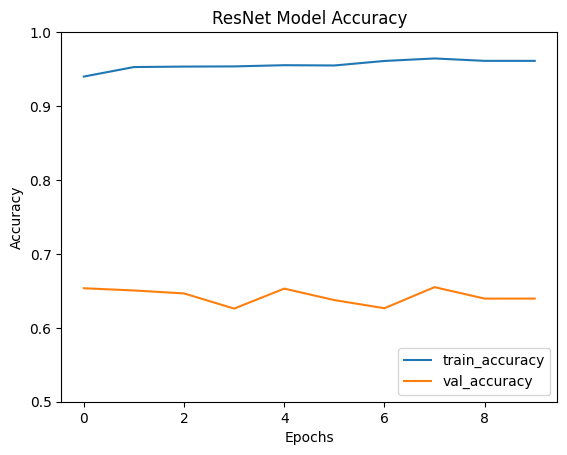

In [31]:
# Evaluate the ResNet Model on the test set
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(ResNet_History.history["accuracy"], label="train_accuracy")
plt.plot(ResNet_History.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.title("ResNet Model Accuracy")
plt.legend(loc="lower right")
plt.show()

In [33]:
# Multi-Modal ResNet Model

input1 = keras.Input(shape=(32, 32, 3), name="img1")
input2 = keras.Input(shape=(32, 32, 3), name="img2")
layer1 = layers.Flatten()(input1)
layer2 = layers.Flatten()(input2)
output = layers.concatenate([layer1, layer2])
multi_modal_model = keras.Model(inputs=[input1, input2], outputs=output, name="Multi_Modal_ResNet")
multi_modal_model.summary()

Model: "Multi_Modal_ResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img1 (InputLayer)           [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 img2 (InputLayer)           [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 flatten_3 (Flatten)         (None, 3072)                 0         ['img1[0][0]']                
                                                                                                  
 flatten_4 (Flatten)         (None, 3072)                 0         ['img2[0][0]']                
                                                                                 

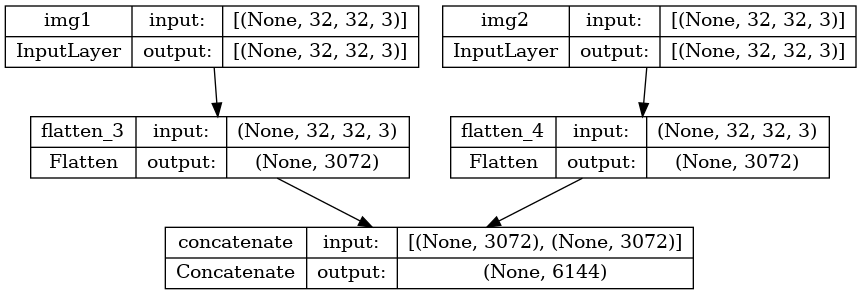

In [34]:
keras.utils.plot_model(multi_modal_model, "Multi_Modal_ResNet.png", show_shapes=True)